In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

DATADIR = "D:\Demo_Data"
Categories = ["AI", "HD"]

IMG_SIZE = 256

#for category in Categories:
    #path = os.path.join(DATADIR, category)
    #for img in os.listdir(path):
        #img_array = cv2.imread(os.path.join(path,img))
        #plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        #plt.title(f"Category: {category}")
        #plt.show()
        
    
    

In [2]:
data = []
labels = []

# Load images and labels
for category in Categories:
    path = os.path.join(DATADIR, category)  # Path to category folder
    class_num = Categories.index(category)  # Assign labels: 0 for 'AI', 1 for 'HD'

    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)  # Read image
            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize image
            data.append(resized_array)  # Append image data
            labels.append(class_num)  # Append label
        except Exception as e:
            print(f"Error loading image {img}: {e}")  # Handle loading errors

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize pixel values (0-255 to 0-1)
data = data / 255.0

# Split into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding) if needed for the model
y_train = to_categorical(y_train, num_classes=len(Categories))
y_test = to_categorical(y_test, num_classes=len(Categories))

# Print shapes for confirmation
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (96, 256, 256, 3)
y_train shape: (96, 2)
x_test shape: (24, 256, 256, 3)
y_test shape: (24, 2)


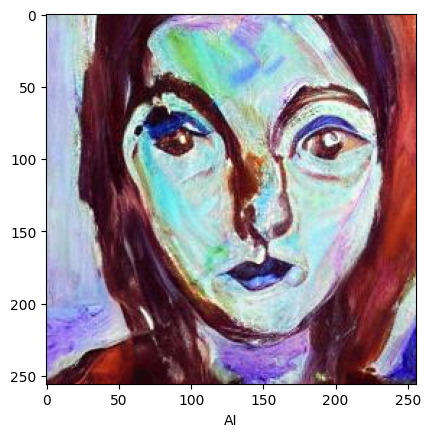

In [3]:
def plot_sample(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(Categories[np.argmax(y[index])])

plot_sample(x_train, y_train, 75)


In [4]:
print("Categories:", Categories)
print("Sample Label from y_train:", y_train[0])


Categories: ['AI', 'HD']
Sample Label from y_train: [1. 0.]


In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(256,256,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(2, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5260 - loss: 7.3058
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5977 - loss: 4.6096
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5612 - loss: 2.1339
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4883 - loss: 0.8975
Epoch 5/5
2/3 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4531 - loss: 0.7400

In [ ]:
ann.evaluate(x_test, y_test)

In [ ]:
y_pred = ann.predict(x_test)
y_pred_Categories = [np.argmax(element) for element in y_pred]
y_test_Categories = [np.argmax(element) for element in y_test]

print("Classification Report: \n", classification_report(y_test_Categories, y_pred_Categories))